<a href="https://colab.research.google.com/github/HenryqueFarias16/Decision-Tree-Classifier/blob/master/classifica%C3%A7%C3%A3o_de_caixas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#temporizador
import time
from functools import wraps
#importar bibliotecas
start_time = time.time()
import pandas as pd                 
import numpy as np
#Para Regressão logistica 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
#Plotagem
import seaborn as sns
time_bibliotecas = time.time() - start_time

In [ ]:
#carregar base de dados ja existente 
start_time = time.time()
dados = pd.read_csv("Tcaixas - Valor.csv", sep=";")
labelencoder_Y = LabelEncoder()
dados['Saida'] = labelencoder_Y.fit_transform(dados['Saida'])
df = pd.DataFrame(dados)
time_Dataset = time.time() - start_time

In [ ]:
#retirada de dados da banco de dados nao usados
start_time = time.time()
df = df.drop('Item', axis=1)
df = df.drop('Valor', axis=1)
time_Delete_dados = time.time() - start_time
df

<module 'seaborn' from '/usr/local/lib/python3.6/dist-packages/seaborn/__init__.py'>

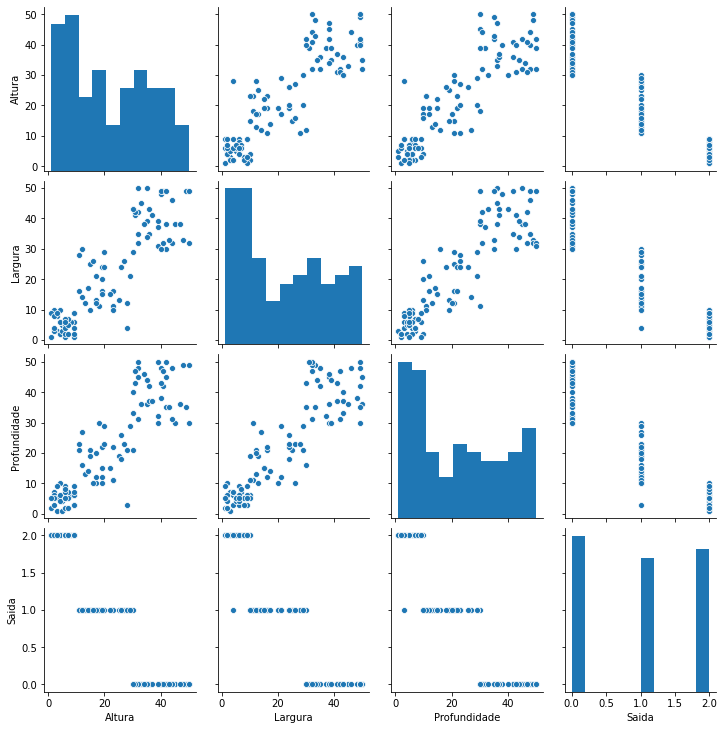

In [ ]:
#plot de graficos
start_time = time.time()
sns.pairplot(df)
time_plot = time.time() - start_time
sns

In [ ]:
start_time = time.time()
# pegando as colunas volume e Valor 
X = df.drop('Saida', axis = 1)
y = df['Saida']
time_corr_vol_valor = time.time() - start_time

In [ ]:
#Separação de teste e treino
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
time_Train_Test_sets = time.time() - start_time

In [ ]:
#treinamento da regressão logistica
start_time = time.time()
rl = LogisticRegression(solver='liblinear')
rl.fit(X_train,y_train)
time_logistic_regression = time.time() - start_time

In [ ]:
start_time = time.time()
pred = rl.predict(X_test)
print(classification_report(y_test,pred))
time_prediction = time.time() - start_time

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        12
           1       1.00      0.36      0.53        11
           2       1.00      1.00      1.00         7

    accuracy                           0.77        30
   macro avg       0.88      0.79      0.77        30
weighted avg       0.85      0.77      0.74        30



In [ ]:
print(pred)

[0 2 0 0 0 0 2 0 2 1 0 0 0 0 0 0 0 2 2 2 0 0 1 0 0 0 1 0 1 2]


In [ ]:
#tempo de cada execução do algoritmo
print("import libraries:                            %.4f" % time_bibliotecas, "segundos.")
print("Load Dataset:                                %.4f" % time_Dataset, "segundos.")
print("removing data:                               %.4f" % time_Delete_dados, "segundos.")
print("ploting data:                                %.4f" % time_plot, "segundos.")
print("Correlation Valor and Vol:                   %.4f" % time_corr_vol_valor, "segundos.")
print("Split Train Test sets:                       %.4f" % time_Train_Test_sets, "segundos.")
print("logistic regression:                         %.4f" % time_logistic_regression, "segundos.")
print("prediction Test:                             %.4f" % time_prediction, "segundos.")


import libraries:                            0.7210 segundos.
Load Dataset:                                0.0238 segundos.
removing data:                               0.0105 segundos.
ploting data:                                1.2814 segundos.
Correlation Valor and Vol:                   0.0017 segundos.
Split Train Test sets:                       0.0027 segundos.
logistic regression:                         0.0040 segundos.
prediction Test:                             0.0175 segundos.
